<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02-Machine-Learning/notebooks/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

En esta notebook mostraremos el uso del clasificador **SVM** (Support Vector Machine). Realizaremos un ejemplo con datos artificiales, con fines didácticos, y un ejemplo más grande, con datos reales.

Usaremos la implementación de sklearn, llamada [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classifier)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

Funciones que necesitamos para graficar las fronteras de decisión

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## El conjunto de datos

Creamos un conjunto de datos con una condición XOR

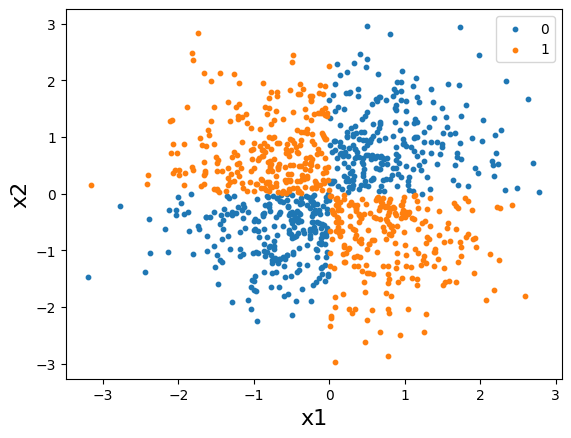

In [4]:
X = np.random.randn(1000, 2)
Y = np.array([int(np.logical_xor(x[0] > 0, x[1] > 0)) for x in X])

plt.figure()
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=10, label='0')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=10, label='1')
plt.legend()
plt.xlabel('x1',fontsize=16)
plt.ylabel('x2',fontsize=16)
plt.show()

Separamos el conjunto de datos en train y test.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(f"X Train: {x_train.shape}")
print(f"X Test: {x_test.shape}")
print(f"Y Train: {y_train.shape}")
print(f"Y Test: {y_test.shape}")

X Train: (800, 2)
X Test: (200, 2)
Y Train: (800,)
Y Test: (200,)


## Clasificación

### SVM lineal

In [6]:
from sklearn.svm import SVC

lin_svm = SVC(kernel='linear')
lin_svm.fit(x_train, y_train)

# Performance
print(f"Training mean accuracy: {round(lin_svm.score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(lin_svm.score(x_test, y_test),3)}")

Training mean accuracy: 0.584
Test mean accuracy: 0.57


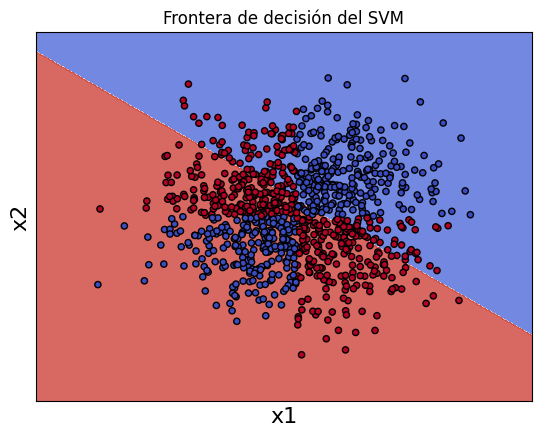

In [7]:
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, ax = plt.subplots(dpi=100)  # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen
plot_contours(ax, lin_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('x2', fontsize=16)
ax.set_xlabel('x1', fontsize=16)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Frontera de decisión del SVM')
plt.show()

### ⭕ Probar otros kernels

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
'''
1. Repetir el experimento de clasificación de arriba, usando otros kernels.
2. Graficar
3. ¿Qué kernel parece dar mejor resultado?
'''

* El kernel lineal es mejor para datos linealmente separables. Es una opción cuando el conjunto de datos es grande. 
* El kernel Gaussiano (RBF) tiende a dar buenos resultados cuando no se tiene información adicional sobre los datos.
* Los kernels polinomiales tienden a dar buenos resultados cuando los datos de entrenamiento están normalizados.

### Usando gridsearch para encontrar los mejores parámetros

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) toma un estimador (por ejemplo, SVM) y un conjunto de parámetros del estimador. Sobre estos parámetros hace una busqueda para encontrar la combinación de parámetros que da mejores resultados en el estimador. 

GridSearchCV tiene métodos “fit” y “score” method, entre otros. Es decir, no es necesario tomar los parámetros e introducirlos en el estimador.

Encuentra los mejores parámetros para el clasificador SVM utilizando grid search. Guíate por el desempeño en el set de entrenamiento y validación.

Prueba los siguientes hyperparámetros.
* kernel = linear, polynomial, rbf
* C = 0.01, 0.1, 1.0, 10, 100
* grado del polinomio = 1, 2, 3, 4 (solo para el kernel polinomial)
* gamma = auto, scale:

Definimos los parámetros sobre los que se hará la busqueda

In [8]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ('linear', 'poly', 'rbf'),
              'degree': [1, 2, 3, 4], 'gamma': ('auto', 'scale')}
param_grid

{'C': [0.01, 0.1, 1, 10, 100],
 'kernel': ('linear', 'poly', 'rbf'),
 'degree': [1, 2, 3, 4],
 'gamma': ('auto', 'scale')}

Realizamos una busqueda sobre estos parámetros 

In [9]:
svc = SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4],
                         'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf')})

In [10]:
# Print info about best score and best hyperparameters
print(f"Best score: {clf.best_score_:.4f}")
print(f"Best params: {clf.best_params_}")

Best score: 0.9938
Best params: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


In [12]:
# Evaluate on the test set
best_svm = SVC(C=100, kernel='poly', degree=2, gamma='auto')
best_svm.fit(x_train, y_train)

print(f"Train mean accuracy: {best_svm.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {best_svm.score(x_test, y_test):6.4f}")

Train mean accuracy: 0.9962
Test mean accuracy: 0.9900


Graficamos la frontera de decisión

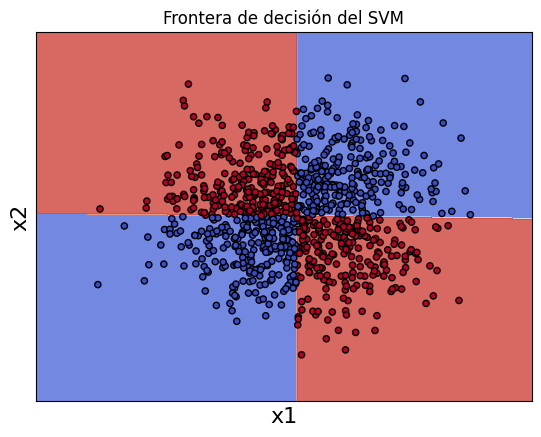

In [13]:
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, ax = plt.subplots(dpi=100)  # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen
plot_contours(ax, best_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('x2', fontsize=16)
ax.set_xlabel('x1', fontsize=16)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Frontera de decisión del SVM')
plt.show()

# Comparando el SVM lineal con el OLS (clasificador lineal)

En este ejercicio vamos a comparar la clasificación y la frontera de decisión del clasificador de la sesión anterior (discriminante lineal OLS) con el SVM con kernel lineal.

Para esto, vamos a usar ambos clasificadores en el mismo conjunto de datos. Después, compararemos la frontera de decisión.

Dado que el clasificador lo implementamos como una clase, podemos usarlo en esta notebook directamente. Hay dos maneras de hacerlo:

* Copiando el código y definiendo la clase otra vez:

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

class LeastSquaresClassifier():
    def __init__(self, W:np.ndarray=None):
        '''
        W es la matriz de pesos, la cual puede ser especificada desde un principio, esto
        es opcional.
        '''
        self.W = W

    def encoderT(self, y:np.ndarray):
        K = np.max(y) + 1
        identidad = np.eye(K)
        return identidad[y] 

    def fit(self, X:np.ndarray, y:np.ndarray):
        '''
        Este método calcula la matriz de pesos para la matriz de puntos "aumentada" X
        y el conjunto de etiquetas y.
        '''
        T = self.encoderT(y)
        self.W = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ T
        
    def clasifica(self, X:np.ndarray):
        '''
        Este método predice las etiquetas para el conjunto de puntos X
        '''
        return np.argmax(X@self.W,axis=1)

* Importando la clase desde un archivo:

In [ ]:
# from clasificador_lineal import LeastSquaresClassifier

Definimos el conjunto de datos, usaremos un dataset de scikit-learn:

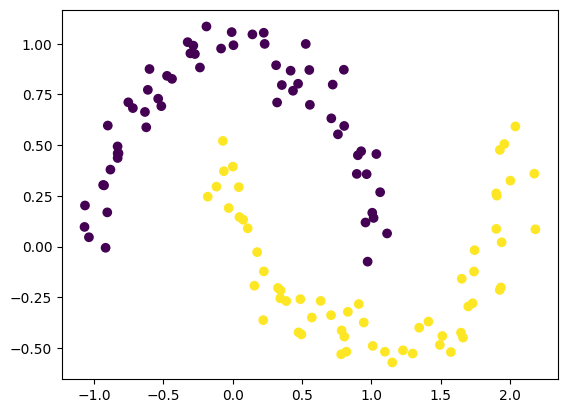

In [24]:
from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples = 120, random_state=89,noise=0.1)

#--- Lo graficamos para verlo ---
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

⭕ Realiza la clasificación usando el clasificador OLS y grafica la frontera de decisión.

Puedes usar el código para clasificar y graficar que usamos en la sesión anterior

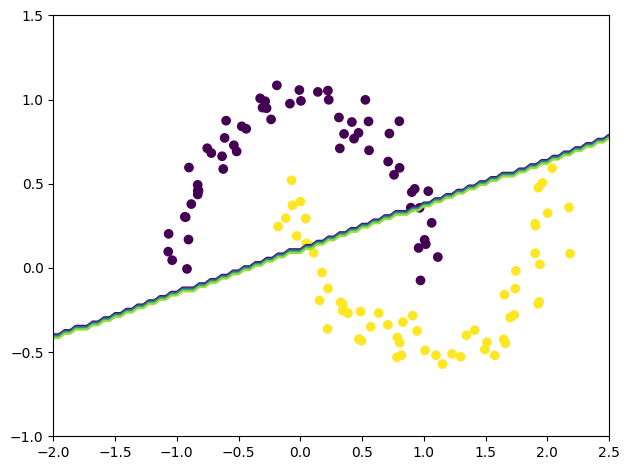

In [29]:
from sklearn.preprocessing import PolynomialFeatures

x1_test, x2_test = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-1, 1.5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

features = PolynomialFeatures(1)
X_train = features.fit_transform(x_train)
X_test = features.fit_transform(x_test)

#------ COMPLETAR ------
modelo = LeastSquaresClassifier()   
modelo.fit(X_train,y_train)          
y_ols = modelo.clasifica(X_test)
#----------------------

plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contour(x1_test, x2_test, y_ols.reshape(100, 100))
plt.tight_layout()
plt.show()

⭕ Ahora, usemos SVM lineal

Realiza la clasificación en el mismo dataset, usando SVM con kernel lineal y grafica la frontera de decisión. Puedes usar el código para clasificar y graficar que usamos anteriormente.

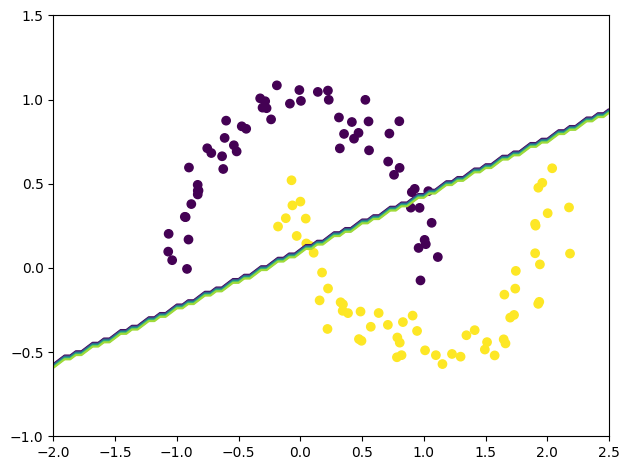

In [28]:
x1_test, x2_test = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-1, 1.5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

#------ COMPLETAR ------
lin_svm = SVC(kernel='linear')
lin_svm.fit(x_train, y_train)
y_svm = lin_svm.predict(x_test)
#----------------------

plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contour(x1_test, x2_test, y_svm.reshape(100, 100))
plt.tight_layout()
plt.show()


Dibujamos ambas FD juntas. 

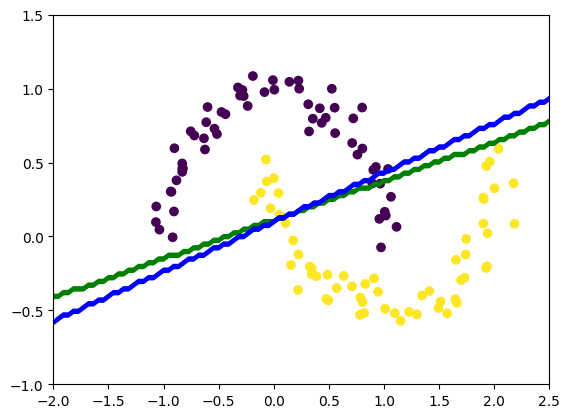

In [34]:
plt.figure()
#-----Dibujar los datos---------------------------------
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
#-----Dibujar X_test (la malla de fondo para ver las regiones ------------
plt.contour(x1_test, x2_test, y_ols.reshape(100, 100),colors='green')
plt.contour(x1_test, x2_test, y_svm.reshape(100, 100),colors='blue')
plt.show()

Observar que no son la misma.

🔵 ¿Por qué no?

# Un ejemplo *real*

Para este problema usaremos el datset de Kaggle: [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

**Contexto**

Los conjuntos de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está altamente desequilibrado, la clase positiva (fraudes) representa el 0.172% de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no se pueden obtener las características originales y más información de fondo sobre los datos. Las características $V_1$, $V_2$, ..., $V_{28}$ son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. La función 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La característica 'Cantidad' es la Cantidad de la transacción, esta característica se puede utilizar para el aprendizaje sensible al costo dependiente del ejemplo. La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Extraer el archivo zip

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

from zipfile import ZipFile 

archivo = "/content/creditcard.zip"

print('Extrayendo contenido...') 
with ZipFile(archivo, 'r') as Zip: 
    Zip.extractall() 
    print('Extracción finalizada.') 

credito = pd.read_csv("creditcard.csv")

Extrayendo contenido...
Extracción finalizada.


In [ ]:
credito.head()

In [ ]:
credito.describe()

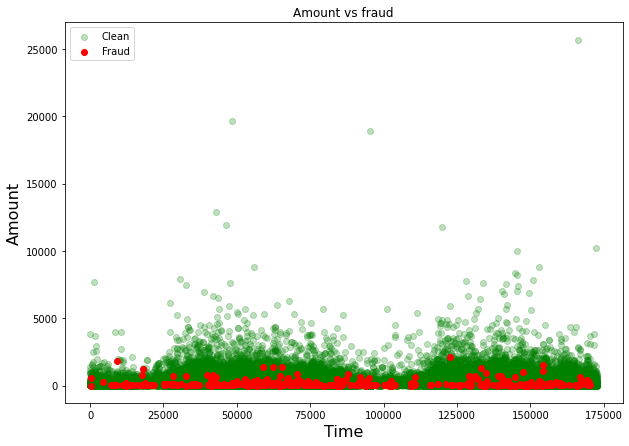

In [ ]:
plt.figure(figsize=(10,7))

# Graficamos los que no son fraude
time_amount = credito[credito['Class'] == 0][['Time','Amount']].values
plt.scatter(time_amount[:,0], time_amount[:,1], 
            c='green',alpha=0.25,label='Clean')
# Graficamos los que sí son fraude
time_amount = credito[credito['Class'] == 1][['Time','Amount']].values
plt.scatter(time_amount[:,0], time_amount[:,1], 
            c='red',label='Fraud')
plt.legend(loc='best')
plt.title('Amount vs fraud')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amount', fontsize=16)
plt.show()

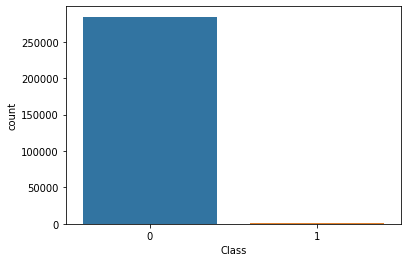

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(x = "Class", data = credito)
plt.show()

credito.loc[:, 'Class'].value_counts()

In [ ]:
No_of_frauds= len(credito[credito["Class"]==1])
No_of_normals = len(credito[credito["Class"]==0])
print("Hay {} transacciones fraudulentas ( Class 1)".format(No_of_frauds))
print("Hay {} transacciones normales ( Class 0)".format(No_of_normals))
total= No_of_frauds + No_of_normals
pf= (No_of_frauds / total)*100
pn= (No_of_normals / total)*100
print("Class 0 porcentage = {}%".format(np.round(pn,2)))
print("Class 1 porcentage = {}%".format(np.round(pf,2)))

Hay 492 transacciones fraudulentas ( Class 1)
Hay 284315 transacciones normales ( Class 0)
Class 0 porcentage = 99.83%
Class 1 porcentage = 0.17%


### Se necesita hacer un submuestreo para balancear las clases

* Está claro que la Clase 1 está subrepresentada ya que solo  representa el 0.17% de todo el conjunto de datos. 
* Si entrenamos nuestro modelo usando este conjunto de datos, el modelo será ineficiente y será entrenado para predecir solo la Clase 0 porque no tendrá suficientes datos de entrenamiento.
* Podemos obtener una alta exactitud al probar el modelo, pero no debemos confundirnos con esto porque nuestro conjunto de datos no tiene datos de prueba equilibrados. Por lo tanto, tenemos que confiar en el recall que se basa en TP y FP.
* En los casos en que tengamos datos asimétricos, agregar datos adicionales de la característica subrepresentada (sobremuestreo) es una opción, mediante la modelación de la distribución de los datos. Por ahora no tenemos esa opción, así que tendremos que recurrir al submuestreo.
* El submuestreo del conjunto de datos implica mantener todos nuestros datos subrepresentados (Clase 1) mientras se muestrea el mismo número de características de la Clase 0 para crear un nuevo conjunto de datos que comprenda una representación igual de ambas clases.

&#9998; **Obtén un conjunto de datos balanceado** 

In [ ]:
#lista los indices de fraude
fraud_idxs = credito[credito["Class"]==1].index.to_list()

#lista de indices normales del data set completo
normal_idxs = credito[credito["Class"]==0].index.to_list()

#seleccion del numero de indices aleatorias igual al de transacciones fraudulentas
random_normal_idxs = np.random.choice(normal_idxs, No_of_frauds*2, replace= False)
random_normal_idxs = np.array(random_normal_idxs)

#concatena indices fraudulentos y normales para tener una lista de indices
undersampled_indices = np.concatenate([fraud_idxs, random_normal_idxs])

#usa la lista de indices sub-muestreados para obtener el data frame
undersampled_data = credito.iloc[undersampled_indices, :]

print(f"Fraude: {len(fraud_idxs)}, No fraude: {len(random_normal_idxs)}")

undersampled_data.head()

Fraude: 492, No fraude: 984


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


### Comprueba que los datos quedaron balanceados

In [ ]:
No_of_frauds_sampled = len(undersampled_data[undersampled_data["Class"]== 1])

No_of_normals_sampled = len(undersampled_data[undersampled_data["Class"]== 0])

print("The number of fraudulent transactions( Class 1) are: ", No_of_frauds_sampled)
print("The number of normal transactions( Class 0) are: ", No_of_normals_sampled)
total_sampled= No_of_frauds_sampled + No_of_normals_sampled
print("The total number of rows of both classes are: ", total_sampled)

Fraud_percent_sampled = (No_of_frauds_sampled / total_sampled)*100
Normal_percent_sampled = (No_of_normals_sampled / total_sampled)*100
print("Class 0 percentage = ", Normal_percent_sampled)
print("Class 1 percentage = ", Fraud_percent_sampled)

#Check the data count now
count_sampled = pd.value_counts(undersampled_data["Class"], sort= True)
count_sampled.plot(kind= 'bar')

### Ahora haremos un proceso llamado [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/abs/1106.1813)
* Para ello necesitamos instalar la librería de _aprendizaje desequilibrado_ ``imbalanced-learn`` de Python

In [ ]:
!pip install imbalanced-learn

In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


### Pre-procesa los datos

In [ ]:
from sklearn import preprocessing

sc = preprocessing.StandardScaler()

undersampled_data.loc[:,"scaled_Amount"] =  undersampled_data["Amount"]
undersampled_data.loc[:,"scaled_Amount"] = sc.fit_transform(\
                                          undersampled_data["scaled_Amount"].\
                                          values.reshape(-1,1))

# quitamos las columnas "Time" y "Amount"
undersampled_data.drop(["Time","Amount"], axis= 1,inplace=True)

undersampled_data.head()

### &#9998; **Obtén la matriz de datos $X$ y el vector de clases $y$ correspondiente** 

In [ ]:
X = undersampled_data.loc[:, undersampled_data.columns != "Class"].values

y = undersampled_data.loc[:, undersampled_data.columns == "Class"].values

### **Hagamos el proceso de sobre-muestreo (SMOTE)**

In [ ]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#### Verifiquemos la cantidad de datos ahora

In [ ]:
from collections import Counter

counter = Counter(y)
print(counter)

### Separa los datos en datos de entrenamiento (75%) y prueba (25%) 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)
print("The split of the under_sampled data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

The split of the under_sampled data is as follows
X_train:  1476
X_test:  492
y_train:  1476
y_test:  492


### Elige una SVM y entrénalo con un conjunto de parámetros de tu elección 

In [ ]:
classifier= SVC(C= 1, kernel= 'rbf', random_state= 0,gamma='scale')
classifier.fit(X_train, y_train.ravel())

SVC(C=1, random_state=0)

### Prueba el modelo y observa la matriz de confusión [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)

CM = confusion_matrix(y_test, y_pred)

print(CM)

[[237   4]
 [ 31 220]]
The accuracy is 92.88617886178862 %
The recall from the confusion matrix is 87.64940239043824 %


También podemos calcular las métricas de rendimiento *manualmente*.

In [ ]:
print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")
print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) +" %")

### Aplica GridSearch para obtener los mejores parámetros para una SVM 

In [ ]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train.ravel())
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)

best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)

The best accuracy using gridSearch is 0.947840128263857
The best parameters for using this model is {'C': 100, 'kernel': 'linear'}


### Utiliza los mejores parámetros para probar de nuevo tu modelo

In [ ]:
#fitting the model with the best parameters
classifier_with_best_parameters =  SVC(C= best_parameters["C"], 
                                       kernel= best_parameters["kernel"], 
                                       random_state= 0)
classifier_with_best_parameters.fit(X_train, y_train.ravel())
#predicting the Class 
y_pred_best_parameters = classifier_with_best_parameters.predict(X_test)
#creating a confusion matrix
#cm2 is the confusion matrix  which uses the best parameters
CM2 = confusion_matrix(y_test, y_pred_best_parameters)
#visualizing the confusion matrix
print(CM2)
print("The accuracy is "+str((CM2[1,1]+CM2[0,0])/(CM2[0,0] + CM2[0,1]+CM2[1,0] + CM2[1,1])*100) + " %")
print("The recall from the confusion matrix is "+ str(CM2[1,1]/(CM2[1,0] + CM2[1,1])*100) + " %")#also printing the confusion matrix 1 for comparison
print(CM)
print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")
print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) + " %")

[[229  12]
 [ 23 228]]
The accuracy is 92.88617886178862 %
The recall from the confusion matrix is 90.83665338645417 %
[[237   4]
 [ 31 220]]
The accuracy is 92.88617886178862 %
The recall from the confusion matrix is 87.64940239043824 %


### &#9998; **Prueba el modelo con el data set completo (sesgado)**

In [ ]:
#creating a new dataset to test our model
datanew = credito.copy()

#Now to test the model with the whole dataset
datanew["scaled_Amount"] =  sc.fit_transform(datanew["Amount"].values.reshape(-1,1))

#dropping time and old amount column
datanew = datanew.drop(["Time","Amount"], axis= 1)

#separating the x and y variables to fit our model
X_full = datanew.iloc[:, undersampled_data.columns != "Class"].values

y_full = datanew.iloc[:, undersampled_data.columns == "Class"].values

#splitting the full dataset into training and test set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size= 0.25, random_state= 0)

print("The split of the full dataset is as follows")
print("X_train_full: ", len(X_train_full))
print("X_test_full: ", len(X_test_full))
print("y_train_full: ", len(y_train_full))
print("y_test_full: ", len(y_test_full))

The split of the full dataset is as follows
X_train_full:  213605
X_test_full:  71202
y_train_full:  213605
y_test_full:  71202


___

In [ ]:
#predicting y_pred_full_dataset
y_pred_full_dataset = classifier_with_best_parameters.predict(X_test_full)

#confusion matrix usign y_test_full and ypred_full
CM3 = confusion_matrix(y_test_full, y_pred_full_dataset)

print(CM3)
print("The accuracy is "+str((CM3[1,1]+CM3[0,0])/(CM3[0,0] + CM3[0,1]+CM3[1,0] + CM3[1,1])*100) + " %")
print("The recall from the confusion matrix is "+ str(CM3[1,1]/(CM3[1,0] + CM3[1,1])*100) + " %")#

[[67547  3535]
 [    8   112]]
The accuracy is 95.0240161793208 %
The recall from the confusion matrix is 93.33333333333333 %


___